# 12.7 TOGGLE STREAMLINES

Use this notebook to store your work for this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from scipy.special import binom
from numpy import random
from scipy.stats import norm
import math
from scipy.stats import stats
from scipy.special import beta
from scipy.signal import convolve
from mpl_toolkits import mplot3d
from numpy.random import default_rng
rand = default_rng().random
from scipy.integrate import odeint

## (a) Nondimensionalize Equation 12.16

cbari = ci/kdi; Gammabari = gammai*taui/(kdi*V)

<ipython-input-6-2360b85e2226>:37: RuntimeWarning: invalid value encountered in power
  dKd1 = -(c1/tau) + ((gamma/V)/(1+(c2/Kd)**n))
<ipython-input-6-2360b85e2226>:38: RuntimeWarning: invalid value encountered in power
  dKd2 = -(c2/tau) + ((gamma/V)/(1+(c1/Kd)**n))


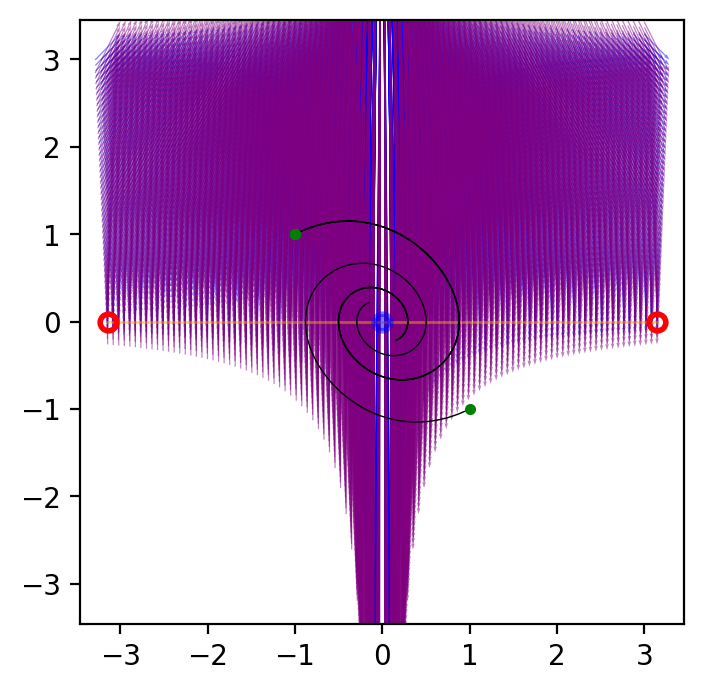

In [6]:
# Solution to 11.6 used in the attempt to solve for this problem
V = 1
c1 = 10
c2 = 20
n = 2.2
gamma = 1.2

def F(y,t, n, gamma):
    dy = [0,0]
    dy[0] = y[1]
    dy[1] = -n * np.sin(y[0]) - gamma*y[1]
    return dy

tMax = 10
N = 100

start = []
start += [(-1, 1)]
start += [(-1, 1)]
start += [(1, -1)]
start += [(-1, 1)]

tau = np.linspace(-np.pi, np.pi, 100)
Kd = np.linspace(-np.pi, np.pi, 100)

tau, Kd = np.meshgrid(tau, Kd)

t = np.linspace(-np.pi, np.pi, 101)

y1 = 0 * t

tA, wA = -np.pi, 0
tB, wB = 0, 0
tC, wC = np.pi, 0

dtau = Kd
dKd1 = -(c1/tau) + ((gamma/V)/(1+(c2/Kd)**n))
dKd2 = -(c2/tau) + ((gamma/V)/(1+(c1/Kd)**n))

plt.figure(dpi=200)                  
plt.quiver(tau, Kd, dtau, dKd1, pivot='mid', scale=75, width=0.002, alpha=0.5, color='blue')
plt.quiver(tau, Kd, dtau, dKd2, pivot='mid', scale=75, width=0.002, alpha=0.5, color='purple')
plt.plot(t,y1,'orange', lw=1, alpha=0.5)
plt.plot(tA, wA, 'ro', mfc='none', mew=2)
plt.plot(tB, wB, 'bo', mew=2, alpha=0.5)
plt.plot(tC, wC, 'ro', mfc='none', mew=2)

t = np.linspace(0,tMax,2001)
for y0 in start:
    y = odeint(F, y0, t, args=(V, beta0))
    plt.plot(y[:,0], y[:,1], 'k', lw=0.5)
    plt.plot(y[0,0], y[0,1], 'g.')

plt.gca().set_aspect('equal', 'box')


## (b)  Plot streamlines

You should choose at least 4 pairs of initial concentrations $[\bar{c}_1(0), \bar{c}_2(0)]$ to illustrate what happens in all 4 quadrants of your phase portrait.

By creating the plot by using varying values, I believe that we would see similar behavior to that seen in figure 12.15b. By changing the concentration, we would see that the locations of the fixed points woudld change. If the concentrations increase, there is a higher possiblity of bifurcation, and as the concentration decreases the possibility of a single fixed point increases. The streamlines would change depending on the location of the fixed points. Depending on the concentration values, the streamlines would have a larger area between them causing the switching to have a more fluctuated behavior. 